In [233]:
from scipy.stats import norm
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

# Part (a)

In [234]:
np.random.seed(42)

In [235]:
mu = 5

In [236]:
n = 100

In [237]:
X = norm.rvs(loc=mu, scale=1, size=n)

Text(0.5, 1.0, 'Histogram of 100 $N(5,1)$ random variables')

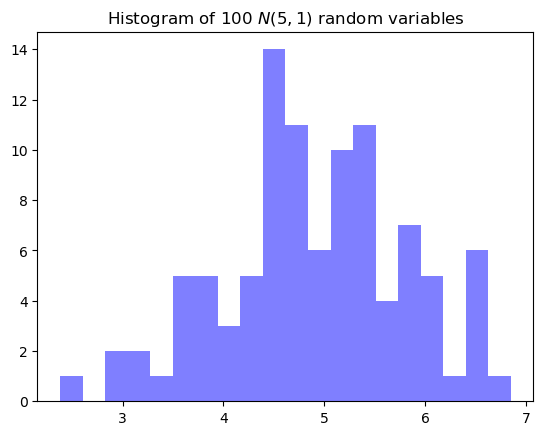

In [238]:
plt.hist(X, bins=20, color='blue', alpha=0.5)
plt.title(r'Histogram of 100 $N(5,1)$ random variables')

# Part (b)

Let's find the posterior density $\mu|x^n$. We have
$$f(\mu|x^n)\propto f(\mu)\mathcal L(\mu)=(2\pi)^{-n/2}e^{-\sum (x_i-\mu)^2/2}.$$
This is equal to
$$(2\pi)^{-n/2}e^{-n\mu^2/2 + n\bar x \mu - \sum x_i^2}\propto e^{(\mu-\bar x)^2/(2n^{-1})}.$$
Thus, we recognize $f(\mu|x^n)$ as the PDF of a $N(\bar x, n^{-1})$ random variable, i.e. $\mu|x^n \sim N(\bar x, n^{-1})$.





<!-- The integral is
$$(2\pi)^{-n/2} \int_{-\infty}^\infty e^{-\sum x_i^2/2 + n\bar x \mu - n\mu^2/2}d\mu = (2\pi)^{-n/2}e^{-\sum x_i^2/2} \int_{-\infty}^\infty e^{-(\mu^2-2\bar x\mu)n/2}d\mu = (2\pi)^{-n/2}e^{-\sum x_i^2/2}e^{\bar x^2n/2} \int_{-\infty}^\infty e^{-n(\mu-\bar x)^2/2}d\mu.$$
The integral is the integral of the PDF of a $N(\bar x,n^{-1})$ distribution, times $\sqrt{2\pi n^{-1}}$. Hence the integral of $f(\mu)\mathcal L(\mu)$ is 
$$(2\pi)^{-n/2}e^{-\sum x_i^2/2}e^{\bar x^2n/2}(2\pi n^{-1})^{1/2}=(2\pi)^{-(n-1)/2}n^{-1/2}e^{-nS^2/2}$$
where $S^2=\frac{1}{n}\left(\sum x_i^2 - \left(\sum x_i\right)^2\right)$ is the sample variance.

Finally then,
$$f(\mu|x^n) = \frac{(2\pi)^{-n/2}e^{-\sum (x_i-\mu)^2/2}}{(2\pi)^{-(n-1)/2}n^{-1/2}e^{-nS^2/2}}
=\sqrt{\frac{n}{2\pi}}e^{nS^2}e^{-\sum (x_i-\mu)^2/2}.$$ -->

Now we use the random variables $X_1,\ldots,X_n$ to plot the posterior density.

In [239]:
avg = np.mean(X)

In [240]:
x = np.linspace(4,6,1000)

In [241]:
y = norm.pdf(x, loc=avg, scale=n**(-1/2))

Text(0.5, 1.0, 'Posterior density of expected value $\\mu$')

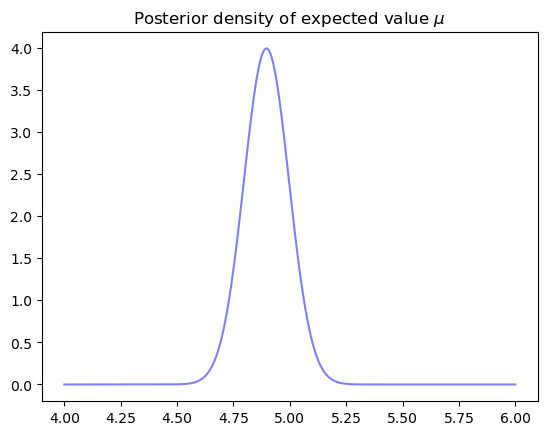

In [242]:
plt.plot(x,y,c='blue',alpha=0.5)
plt.title(r'Posterior density of expected value $\mu$')

# Part (c)

Now we sample from the posterior density.

In [243]:
X_new = norm.rvs(loc=avg, scale=n**(-1/2), size=1000)

Text(0.5, 1.0, 'Histogram of 1000 samples from the posterior density')

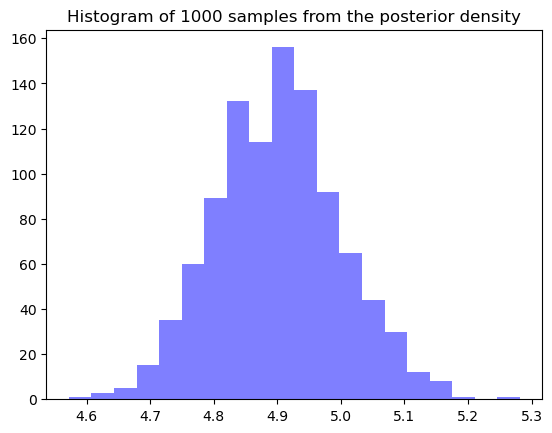

In [244]:
plt.hist(X_new, bins=20, color='blue', alpha=0.5)
plt.title(r'Histogram of 1000 samples from the posterior density')

In [245]:
print(f'Mean of random variables X_i: {avg:.5f}')

Mean of random variables X_i: 4.89615


We see that the draws from the posterior density are concentrated heavily around the mean of the $X_i$, approximately 4.9. In particular the variance of $X_{\text{new}}$ is much smaller than the variance of the $X_i$.

# Part (d)

First we find the distribution $\theta|x^n$ analytically. We have $F_\theta(t)=\mathbb{P}(\theta \leq t)=\mathbb{P}(\mu\leq \log t)$. Thus $f_\theta(t)=\frac{1}{t}f_\mu(\log t)$. Here the PDF's and CDF's are understood to be conditional on $x^n$. Finally,
$$f_\theta(t)=\frac{1}{t} \sqrt{\frac{n}{2\pi}}e^{-n(\log t-\bar x)^2/2}$$
for $t>0$ and $f_\theta(t)=0$ otherwise.
We plot this below.

In [246]:
f = partial(norm.pdf, loc=avg, scale=n**(-1/2))

In [247]:
g = lambda t: np.sqrt(n/2 * np.pi) * np.exp(-n * (np.log(t) - avg)**2/2)

In [248]:
def posterior(t):
    if t > 0:
        return f(np.log(t)) / t
    else:
        return 0

In [249]:
x = np.linspace(0,400,10000)

In [250]:
y = list(map(posterior, x))

Text(0.5, 1.0, 'Posterior density of $\\theta=e^\\mu$')

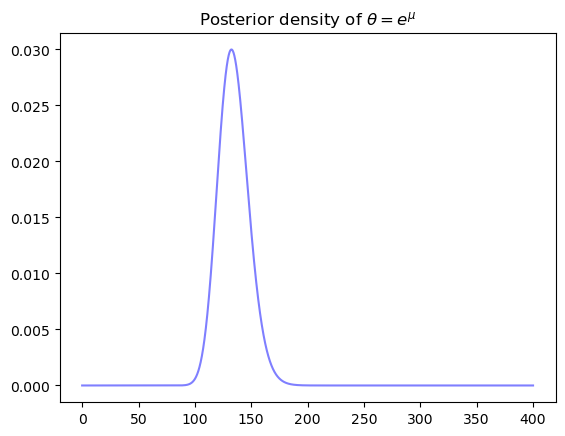

In [251]:
plt.plot(x, y, c='blue', alpha=0.5)
plt.title(r'Posterior density of $\theta=e^\mu$')

Now we plot for $\theta|X^n$ by sampling from $\mu|X^n$ and applying the exponential function.

In [252]:
theta = np.exp(X_new)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   4.,   8.,  19.,  49.,  63.,  91., 122., 108.,
        131., 103., 102.,  62.,  40.,  37.,  29.,  11.,   9.,   6.,   2.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.        ,   4.04040404,   8.08080808,  12.12121212,
         16.16161616,  20.2020202 ,  24.24242424,  28.28282828,
         32.32323232,  36.36363636,  40.4040404 ,  44.44444444,
         48.48484848,  52.52525253,  56.56565657,  60.60606061,
         64.64646465,  68.68686869,  72.72727273,  76.76767677,
         80.

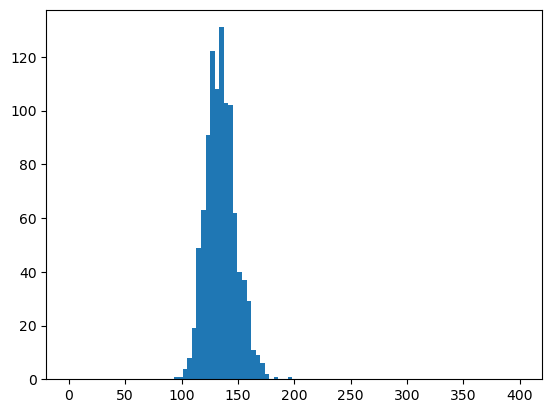

In [253]:
plt.hist(theta, bins=np.linspace(0,400,100))

We see that the histogram and function plot match very closely.

# Part (e)

Now we compute a 95% posterior confidence interval for $\mu$. A 95% posterior interval for $\mu|x^n$ is $(a,b)$ where $a$ is the 2.5% quantile for $\mu|x^n$ and $b$ the 97.5% quantile for $\mu|x^n$. Since $\mu|x^n\sim N(\bar x,n^{-1})$, the quantiles are
$$a=n^{-1/2} \Phi^{-1}(0.025) + \bar x = \bar x - n^{-1/2} z_{0.05} \text{ and } b=n^{-1/2} \Phi^{-1}(0.975) + \bar x = \bar x + n^{-1/2} z_{0.05}.$$
We compute this for the sample $X$ we computed earlier.

In [262]:
alpha = 0.05

In [263]:
z = norm.ppf(1-alpha/2)

In [264]:
lower = avg - (n**(-1/2))*z 

In [265]:
upper = avg + (n**(-1/2))*z

In [266]:
print(f'Posterior interval for mu: ({lower:.4f}, {upper:.4f})')

Posterior interval for mu: (4.7002, 5.0921)


# Part (d)

We'll compute a posterior interval for $\theta$ analytically. In general for $X\sim N(\mu,\sigma)$, if $Y=e^X$, then
$$F_Y(t)=\mathbb{P}(e^X \leq t)=\mathbb{P}(X\leq \log t)=\mathbb{P}\left(\frac{X-\mu}{\sigma}\leq \frac{\log t - \mu}{\sigma}\right) = \Phi\left(\frac{\log t -\mu}{\sigma}\right).$$
Solving for $t$ yields
$$t=e^{\sigma \Phi^{-1}(\alpha) + \mu}.$$

In our situation, a posterior interval for $\theta$ is thus $(a,b)$ where
$$a=e^{n^{-1/2}\Phi^{-1}(0.025)+\bar x} \text{ and } b=e^{n^{-1/2}\Phi^{-1}(0.975) +\bar x}.$$
We compute this for the sample we computed earlier.

In [267]:
lower = np.exp(n**(-1/2)*norm.ppf(0.025) + avg)

In [268]:
upper = np.exp(n**(-1/2)*norm.ppf(0.975) + avg)

In [269]:
print(f'Posterior interval for theta: ({lower:.4f}, {upper:.4f})')

Posterior interval for theta: (109.9644, 162.7394)
